<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1 </H3>
<hr style="height:2px;border:none"/>

<center>
    <h4>Victoria Miranda Burgos - 201604521-K</h4>
    <h4>Matías Marchant Ayarza - 201673556-9</h4>
</center>

## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).

In [2]:
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows_s = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows_s, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2

df_train_text = df_train.Text
df_test_text = df_test.Text

labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

In [3]:
#Cantidad de reviews
cant_reviews_train = df_train_text.shape[0]
cant_reviews_test = df_test_text.shape[0]

#Largo de los textos
#Train
arreglo_largos_review_train = []
suma_total = 0
for i in df_train_text:
    largo_review = len(i)
    arreglo_largos_review_train.append(largo_review)
    suma_total = suma_total + largo_review
    
max_chars_review_train = np.max(arreglo_largos_review_train)
min_chars_review_train = np.min(arreglo_largos_review_train)
promedio_chars_review_train = suma_total/cant_reviews_train
mediana_chars_review_train = np.median(arreglo_largos_review_train)

#Test
arreglo_largos_review_test = []
suma_total = 0
for i in df_test_text:
    largo_review = len(i)
    arreglo_largos_review_test.append(largo_review)
    suma_total = suma_total + largo_review

max_chars_review_test = np.max(arreglo_largos_review_test)
min_chars_review_test = np.min(arreglo_largos_review_test)
promedio_chars_review_test = suma_total/cant_reviews_test
mediana_chars_review_test = np.median(arreglo_largos_review_test)

#Cantidad de ejemplo por cada clase
positivos_train = sum(labels_train)
negativos_train = cant_reviews_train - positivos_train

positivos_test = sum(labels_test)
negativos_test = cant_reviews_test - positivos_test

print("Cantidad reviews en conjunto entrenamiento:", cant_reviews_train)
print("Mediana longitud en chars reviews en conjunto entrenamiento:", mediana_chars_review_train)
print("Cantidad reviews positivos en conjunto entrenamiento:", positivos_train)
print("Texto mas largo en conjunto entrenamiento:", max_chars_review_train)
print("-------------------------------------------------")
print("Cantidad reviews en conjunto de test:", cant_reviews_test)
print("Mediana longitud en chars reviews en conjunto test:", mediana_chars_review_test)
print("Cantidad reviews positivos en conjunto test:", positivos_test)
print("Texto mas largo en conjunto de test:", max_chars_review_test)

Cantidad reviews en conjunto entrenamiento: 3554
Mediana longitud en chars reviews en conjunto entrenamiento: 111.0
Cantidad reviews positivos en conjunto entrenamiento: 1770.0
Texto mas largo en conjunto entrenamiento: 267
-------------------------------------------------
Cantidad reviews en conjunto de test: 3554
Mediana longitud en chars reviews en conjunto test: 114.0
Cantidad reviews positivos en conjunto test: 1751.0
Texto mas largo en conjunto de test: 268


> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [4]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.25, random_state=0)

//test_size = 0.25

> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el dominio de lenguaje natural.

In [5]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

**R:** El pre-procesamiento puede ayudar significativamente en la certeza de un output. Además elimina palabras/caracteres no necesarios de un texto (ej: HTML tags, stopwords), disminuyendo tiempos computacionales y esfuerzo en el procesamiento. 
Transformando todo a minúscula es otro método bastante efectivo, puesto que el algoritmo puede tomar, por ejemplo, "Mesa" y "mesa" como inputs diferentes, siendo que son iguales, entregando un output incorrecto.

> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [6]:
import numpy as np
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from astropy.table import Table, Column

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train) #diccionario de todas las palabras
features_train = vectorizer.transform(texts_train) 
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names() 
#dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

sum_train = features_train.sum(axis = 0)
sum_val = features_val.sum(axis = 0)
sum_test = features_test.sum(axis = 0)

train_freq = [(word, sum_train[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
val_freq = [(word, sum_val[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
test_freq = [(word, sum_test[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

train_freq.sort(key = operator.itemgetter(1),reverse = True)
val_freq.sort(key = operator.itemgetter(1),reverse = True)
test_freq.sort(key = operator.itemgetter(1),reverse = True)

#print(features_train)

print("Las 15 palabras mas usadas de cada conjunto:\n")

t = Table([train_freq[0:15], val_freq[0:15], test_freq[0:15]], names=('training', 'validation', 'testing'))
print(t)

Las 15 palabras mas usadas de cada conjunto:

  training [2]    validation [2]   testing [2]   
---------------- --------------- ----------------
     film .. 443     film .. 141      film .. 581
    movie .. 372    movie .. 131     movie .. 568
      one .. 196      like .. 80       one .. 259
       ha .. 184       one .. 63        ha .. 246
     like .. 175        ha .. 51      like .. 239
     make .. 149      time .. 45     story .. 204
    story .. 138      good .. 44 character .. 178
character .. 129       doe .. 41      time .. 176
     even .. 111      much .. 41      make .. 167
     good .. 110    comedy .. 39      good .. 142
   comedy .. 108     story .. 39    comedy .. 138
     time .. 103      make .. 37       doe .. 134
       way .. 99 character .. 36      even .. 129
      work .. 94      life .. 34      much .. 127
       doe .. 91      even .. 33  director .. 113


> e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

Puntos amarillos: reviews positivas (1)
Puntos morados: reviews negativas (0)


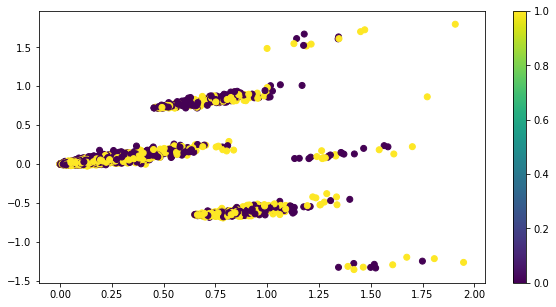

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.colorbar()
print("Puntos amarillos: reviews positivas (1)")
print("Puntos morados: reviews negativas (0)")
plt.show()

**R:** Al observar el gráfico se pueden apreciar ciertos grupos de datos, pero en cada grupo hay elementos de ambas clases, por lo tanto no son linealmente separables.

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.

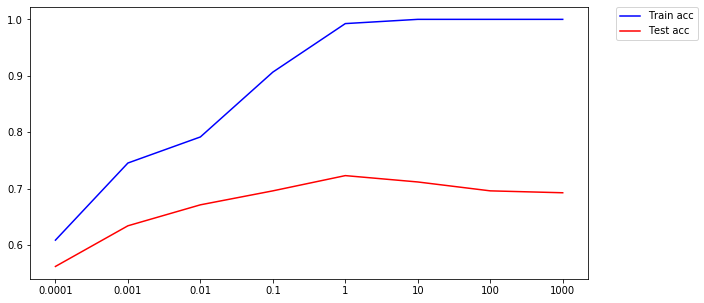

Mayor precision de Regresion Logística: 0.7232845894263217


In [8]:
from sklearn.linear_model import LogisticRegression

def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Cs = [10**i for i in range(-4,4)]
train_acc_lista = []
test_acc_lista = []

#evaluar con diferentes valores de C
for i in range(0,8):
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = Cs[i])
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    
best_test_acc_LGRegression = max(test_acc_lista)
plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)

plt.show()

print("Mayor precision de Regresion Logística:", best_test_acc_LGRegression)

**R:** El parámetro regularizador C indica cuanto se quiere penalizar en el modelo clasificar incorrectamente un dato. Si C es muy grande, se eligirá un hiperplano con margen más pequeño. Al contrario, si C es pequeño, se eligirá un hiperplano con margen más grande, puesto que clasificar incorrectamente algunos datos no tendrá una gran penalización.
Por lo dicho anteriormente, C ayuda a evitar overfitting en el modelo.

Es difícil estimar un valor para C ya que depende del problema, es preferible ir probando con distintos valores y elegir el que entregue una mayor precisión.

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.


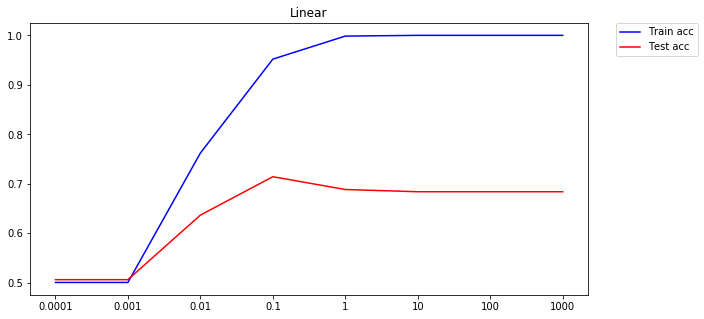

C:\Users\Matias\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


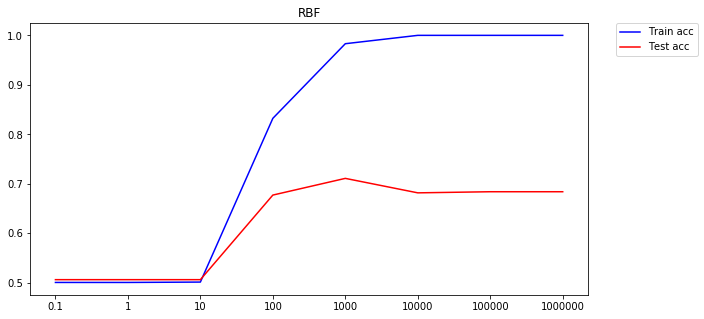

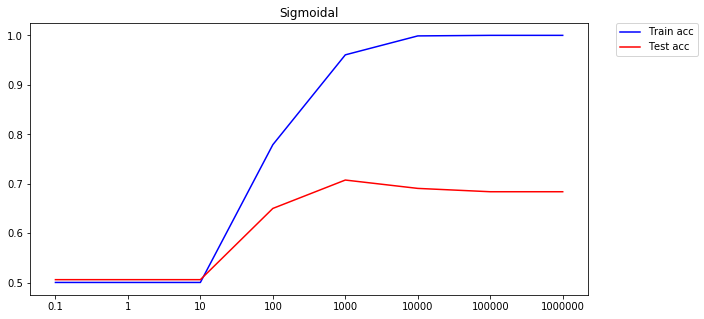

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification

def do_SVM(x,y,xv,yv, param, kernel='linear'):
    #print("Param C = " + str(param) + ' Kernel = ' + kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Cs = [10**i for i in range(-4,4)]

train_acc_lista = []
test_acc_lista = []

for i in range(0,8):
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param = Cs[i], kernel='linear')
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)

best_test_acc_linearSVM = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)
plt.title("Linear")

plt.show()

#--------------------------------------------------------------------------------------#

train_acc_lista = []
test_acc_lista = []

Cs_rbf = [10**i for i in range(-1, 7)]
for i in range(0,8):
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param = Cs_rbf[i], kernel='rbf')
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)

best_test_acc_rbfSVM = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs_rbf)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs_rbf)
plt.title("RBF")

plt.show()

#--------------------------------------------------------------------------------------#

train_acc_lista = []
test_acc_lista = []

Cs_sigmoid = [10**i for i in range(-1, 7)]

for i in range(0,8):
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param = Cs_sigmoid[i], kernel='sigmoid')
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    #print(" /// Train accuracy = " + str(train_acc) + " /// Test accuracy = " + str(test_acc))
    
best_test_acc_sigmoidSVM = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs_sigmoid)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs_sigmoid)
plt.title("Sigmoidal")

plt.show()

In [10]:
print("Mejor test accuracy de linear SVM:", best_test_acc_linearSVM)
print("Mejor test accuracy de rbf SVM:", best_test_acc_rbfSVM)
print("Mejor test_accuracy de sigmoid SVM:", best_test_acc_sigmoidSVM)

Mejor test accuracy de linear SVM: 0.7142857142857143
Mejor test accuracy de rbf SVM: 0.7109111361079865
Mejor test_accuracy de sigmoid SVM: 0.7075365579302587


**R:** Se observa que con diferentes kernel, también cambia la precición de cada C. Como se dijo anteriormente, es buena práctica ir variando el C para cada kernel y elegir el con mejor precisión.

> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

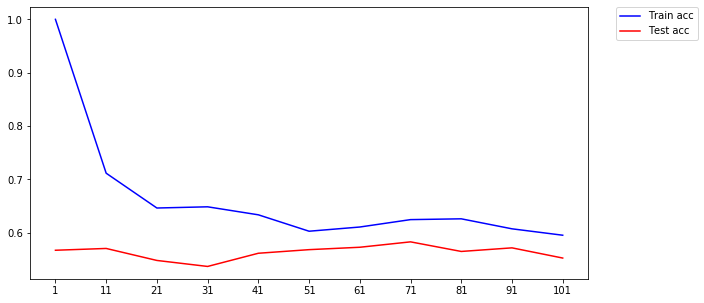

In [11]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K =",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

train_acc_lista = []
test_acc_lista = []

Cs = [i for i in range(1,102,10)]

for i in range(0, 11):
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = int(Cs[i]))
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    
best_test_acc_kNN = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)
plt.show("Presicion con KNN")

plt.show()


In [12]:
print("Mejor test_accuracy de kNN:", best_test_acc_kNN)

Mejor test_accuracy de kNN: 0.5826771653543307


**R:** Se aumentaron los vecinos en 10 en cada iteración y luego se graficaron los valores. En el gráfico se observa que la mayor precisión del es de 0.58 con alrededor de 71 vecinos. 

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.

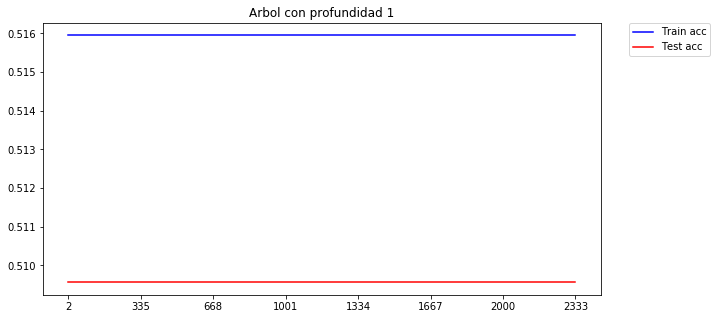

Mejor precision:  0.5095613048368954


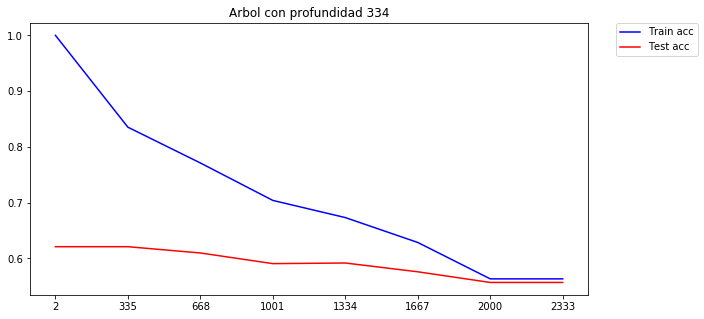

Mejor precision:  0.6209223847019123


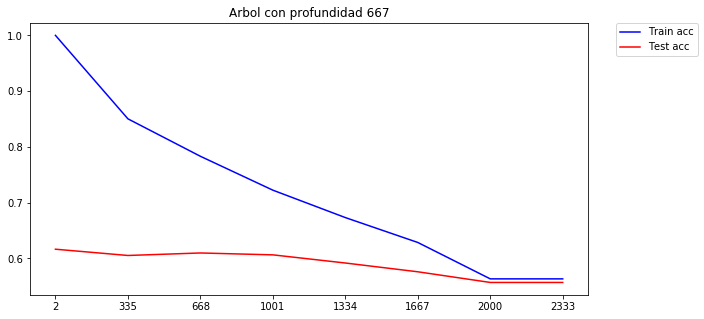

Mejor precision:  0.6164229471316085


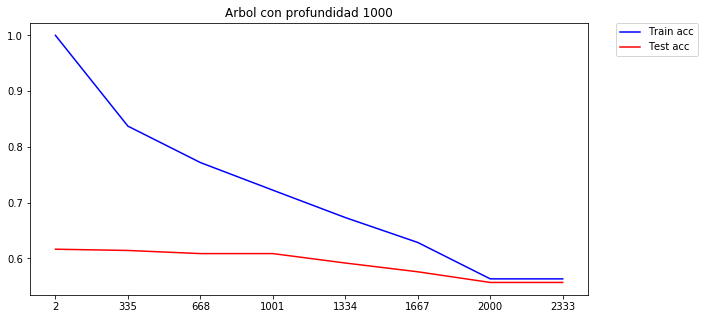

Mejor precision:  0.6164229471316085


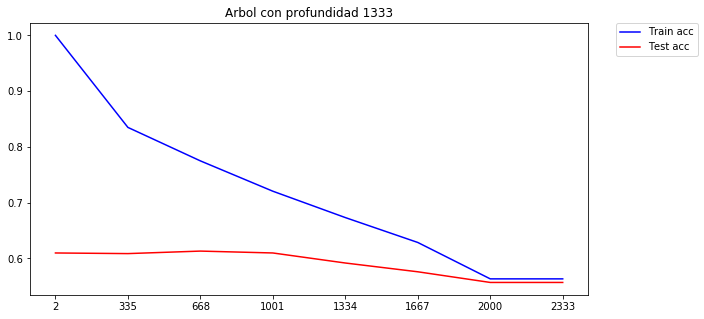

Mejor precision:  0.6130483689538808


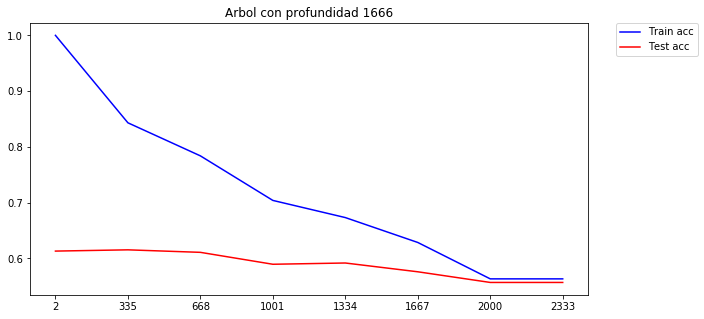

Mejor precision:  0.6152980877390326


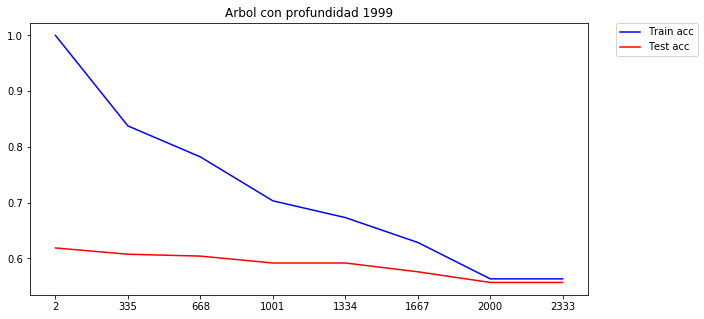

Mejor precision:  0.6186726659167604


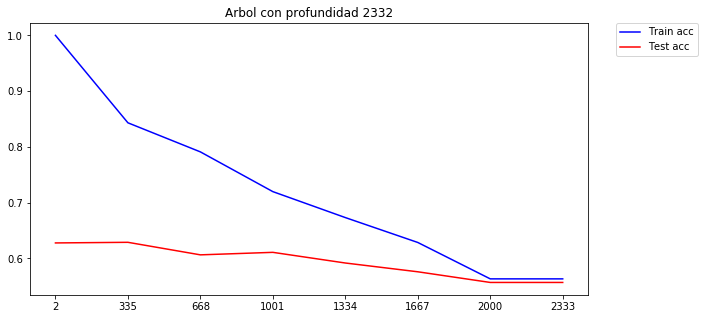

Mejor precision:  0.6287964004499438


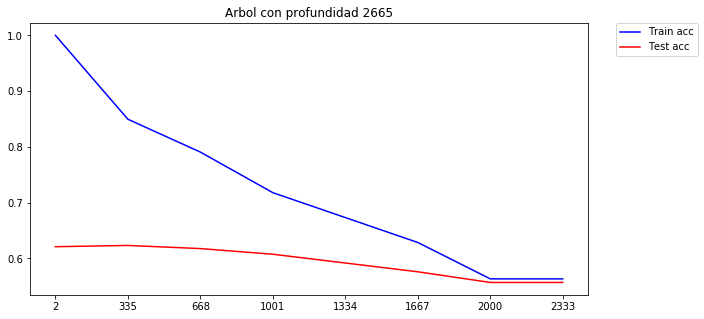

Mejor precision:  0.6231721034870641


In [13]:
from sklearn.tree import DecisionTreeClassifier as Tree

def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D =",param_d, 'Min-samples-S =', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

#Buscamos un buen valor para min_samples_split, para después variar max_depth

particion = len(labels_train)/8
Profundidad = [i for i in range(1,len(labels_train)+1,int(particion))]
Samples = [i for i in range(2,len(labels_train)+1,int(particion))]

for p in Profundidad:
    train_acc_lista = []
    test_acc_lista = []
    for s in Samples:
        model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d = p , param_m = s)
        train_acc_lista.append(train_acc)
        test_acc_lista.append(test_acc)

    plt.figure(figsize=(10,5))
    best_test_acc_Tree = max(test_acc_lista)

    xi = list(range(1,len(labels_train),int(particion)))
    plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
    plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(xi,Samples)
    plt.title("Arbol con profundidad "+str(p))

    plt.show()
    
    print("Mejor precision: ", best_test_acc_Tree)

**R:** Separamos las profundidades en 8 tramos: dividimos las cantidad de datos del conjunto de entrenamiento en 8, entonces la primera profundidad es de 1, la segunda es de un octavo de la cantidad de datos, la siguiente es de dos octavos y así hasta llegar a los ocho.
Lueego analizando los gráficos vemos que la precisión baja a medida que aumenta la cantidad de muestras. Lo cual puede significar que cuando hay pocos datos, estos son linealmente separables, pero a medida que se van agregando muestras, estos ya no pueden distinguirse en diferentes grupos por lo que disminuye la accuracy.

El arbol que obtiene la mejor precisión es el arbol de profundidad 100 con 0.6287 aproximadamente de accuracy. En general la precisión no varía mucho cambiando la profundidad.

> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

Neuron hidden =  2


Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512


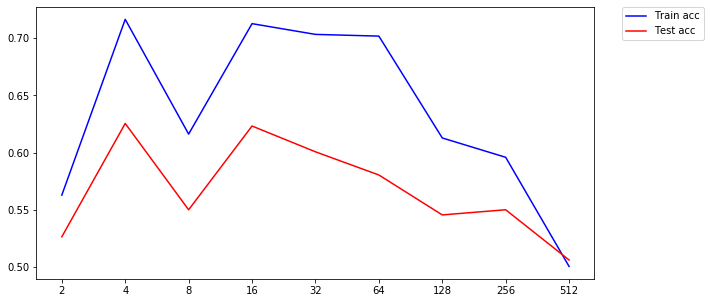

Mejor test accuracy de ANN: 0.6254218220710754


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc

N_h = [2**i for i in range(1,10)]

train_acc_lista = []
test_acc_lista = []

for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, param = i)
    
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    
best_test_acc_ANN = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(1,10))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, N_h)

plt.show()

print("Mejor test accuracy de ANN:", best_test_acc_ANN)

**R:** La ejecución de este algoritmo es bastante más lenta que los demás. Entrega una buena precisión pero hay algoritmos mejores y que se demoran menos. Además se aprecia que a medida que se aumenta la cantidad de neuronas, disminuye la accuracy. 

> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

In [15]:
model, train_acc, val_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 1)
print(f"Precision Training: {train_acc}")
print(f"Precision Validacion: {val_acc}")
print(f"Precision Test: {model.score(features_test, labels_test)}")

Precision Training: 0.9924953095684803
Precision Validacion: 0.7232845894263217
Precision Test: 0.7090602138435566


**R:** El mejor modelo obtenido es el de Regresión Logística con C = 1, el cual da un precisión de 0.72 aproximadamente. Luego se procede a evaluar la precisión de todos los conjuntos. Y vemos que el conjunto de pruebas da una accuracy de alrededor de 0.71 lo cual es un buen valor 


> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)


vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)
print("Precisión usando VADER: "+str(accuracy_score(labels_test, vader_pred_test)))

Precisión usando VADER: 0.6359032076533483


Al utilizar Vader se obtiene una precisión de 0.64 la cual no es una mala precisión en absoluto, pero se han conseguido mejores valores con otros modelos. Sin embargo, es importante destacar que es un método bastante rápido.

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [17]:
#Usando el modelo de Logistic Regression con C = 1 (con mejor accuracy)

model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 1)

V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

In [18]:
palabra_mas_positiva = vocab[0]
palabra_mas_negativa = vocab[0]
indice_mas_positiva = 0
indice_mas_negativa = 0

for i in range(0, len(word_scores)):
    if(word_scores[i][0] > word_scores[indice_mas_negativa][0]):
        indice_mas_negativa = i
        palabra_mas_negativa = vocab[i]
    if(word_scores[i][1] > word_scores[indice_mas_positiva][1]):
        indice_mas_positiva = i
        palabra_mas_positiva = vocab[i]
print("palabra mas positiva:", palabra_mas_positiva, "y palabra mas negativa:", palabra_mas_negativa)

palabra mas positiva: world y palabra mas negativa: cliche


**R:** Se obtuvo que la palabra más negativa fue "cliche"(malo) y la más positiva "world" (mundo), lo cual tiene sentido. Es lógico que una reseña negativa tenga la palabra "cliche", la positiva (world) no nos dice mucho sobre la reseña.

> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.

In [21]:
from nltk.stem.porter import PorterStemmer

def base_word_PorterStemmer(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)

def word_extractor_stem(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word_PorterStemmer(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words

# ejemplos de inciso c) 
print(word_extractor_stem("I love to eat cake"))
print(word_extractor_stem("I love eating cake"))
print(word_extractor_stem("I loved eating the cake"))
print(word_extractor_stem("I do not love eating cake"))
print(word_extractor_stem("I don't loooove eating cake"))

texts_train_st = [word_extractor_stem(text) for text in df_train_text]
texts_val_st = [word_extractor_stem(text) for text in df_val_text]
texts_test_st = [word_extractor_stem(text) for text in df_test_text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train_st) #diccionario de todas las palabras
features_train_st = vectorizer.transform(texts_train_st) 
features_val_st = vectorizer.transform(texts_val_st)
features_test_st = vectorizer.transform(texts_test_st)


model_st, train_acc, val_acc = do_LOGIT(features_train_st,labels_train,features_val_st,labels_val, param = 1)
print("Precision Training: ",train_acc)
print("Precision Validacion: ",val_acc)
print("Precision Test: ", model_st.score(features_test_st, labels_test))

 love eat cake
 love eat cake
 love eat cake
 love eat cake
 n't loov eat cake
Precision Training:  0.9864915572232645
Precision Validacion:  0.6985376827896513
Precision Test:  0.7217220033764772


Al realizar la técnica de stemming si mejora levemente la precisión del conjunto de testing, pero los otro dos empeoran un poco.

> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train_st)
tfidf_model.transform(texts_train_st)

tfidf_model.transform(texts_val_st)
tfidf_model.transform(texts_test_st)

<3554x6834 sparse matrix of type '<class 'numpy.float64'>'
	with 35008 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train_st)
features_train = vectorizer.transform(texts_train_st)
# transform val and test

features_val = vectorizer.transform(texts_val_st)

features_test = vectorizer.transform(texts_test_st)

#
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train_st.sum(axis=0)).reshape(-1,))

#### Repeticion creación modelos

> Logistic Regression

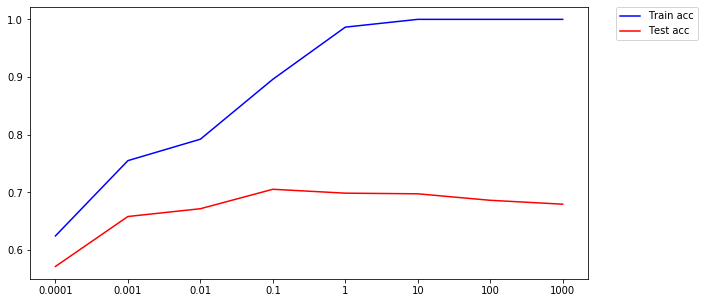

Mejor test accuracy de Linear Regression con Stemming: 0.7052868391451068


In [30]:
Cs = [10**i for i in range(-4,4)]

train_acc_lista = []
test_acc_lista = []
for i in range(0,8):
    model, train_acc, test_acc = do_LOGIT(features_train_st,labels_train,features_val_st,labels_val, param = Cs[i])
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    #print(" /// Train accuracy = " + str(train_acc) + " /// Test accuracy = " + str(test_acc))

best_test_acc_LGRegression = max(test_acc_lista)
plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)

plt.show()

print("Mejor test accuracy de Linear Regression con Stemming:", best_test_acc_LGRegression)

**R:** Empeoró con respecto a representación de datos utilizando lemmatization en alrededor de 0.02

> SVM Lineal

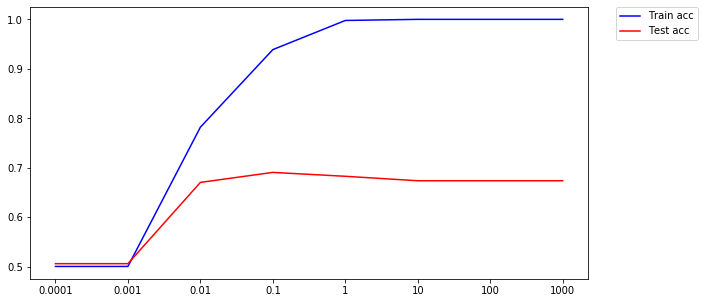

Mejor test accuracy de linear SVM: 0.6906636670416197


In [31]:
Cs = [10**i for i in range(-4,4)]
train_acc_lista = []
test_acc_lista = []

for i in range(0,8):
    model, train_acc, test_acc = do_SVM(features_train_st,labels_train,features_val_st,labels_val, param = Cs[i], kernel='linear')
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    #print(" /// Train accuracy = " + str(train_acc) + " /// Test accuracy = " + str(test_acc))
    
best_test_acc_linearSVM = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)

plt.show()

print("Mejor test accuracy de linear SVM:", best_test_acc_linearSVM)

**R:** Al igual que con el modelo Logistic Regression, empeoró en alrededor de 0.02

> Rbf SVM

C:\Users\Matias\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


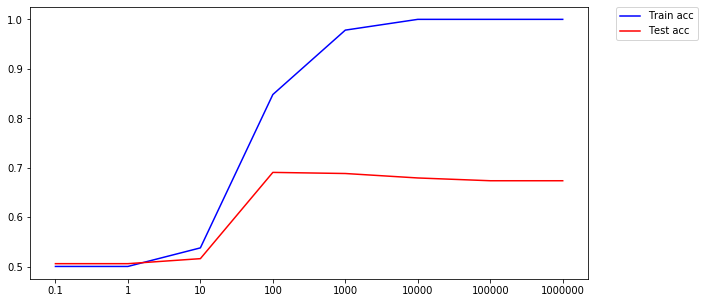

Mejor test accuracy de rbf SVM: 0.6906636670416197


In [32]:
train_acc_lista = []
test_acc_lista = []

Cs_rbf = [10**i for i in range(-1, 7)]
for i in range(0,8):
    model, train_acc, test_acc = do_SVM(features_train_st,labels_train,features_val_st,labels_val, param = Cs_rbf[i], kernel='rbf')
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    #print(" /// Train accuracy = " + str(train_acc) + " /// Test accuracy = " + str(test_acc))
    
best_test_acc_rbfSVM = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs_rbf)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs_rbf)

plt.show()

print("Mejor test accuracy de rbf SVM:", best_test_acc_rbfSVM)

**R:** También empeora en alrededor de 0.01

> Sigmoid SVM

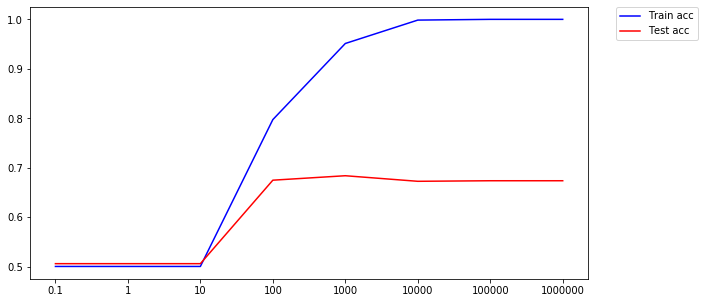

Mejor test_accuracy de sigmoid SVM: 0.6839145106861643


In [33]:
train_acc_lista = []
test_acc_lista = []

Cs_sigmoid = [10**i for i in range(-1, 7)]

for i in range(0,8):
    model, train_acc, test_acc = do_SVM(features_train_st,labels_train,features_val_st,labels_val, param = Cs_sigmoid[i], kernel='sigmoid')
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    #print(" /// Train accuracy = " + str(train_acc) + " /// Test accuracy = " + str(test_acc))

best_test_acc_sigmoidSVM = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs_sigmoid)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs_sigmoid)

plt.show()

print("Mejor test_accuracy de sigmoid SVM:", best_test_acc_sigmoidSVM)

**R:** También empeora en alrededor de 0.02 Empeoró también

> kNN

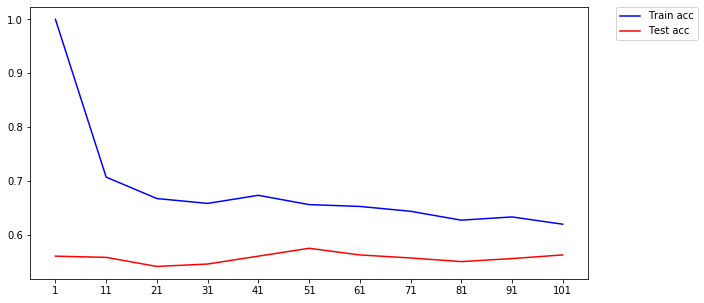

Mejor test_accuracy de kNN: 0.5748031496062992


In [34]:
train_acc_lista = []
test_acc_lista = []

Cs = [i for i in range(1,102,10)]

for i in range(0, 11):
    model, train_acc, test_acc = do_KNN(features_train_st,labels_train,features_val_st,labels_val, param = int(Cs[i]))
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    #print(" /// Train accuracy = " + str(train_acc) + " /// Test accuracy = " + str(test_acc))

best_test_acc_kNN = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)

plt.show()

print("Mejor test_accuracy de kNN:", best_test_acc_kNN)

**R:** Empeoró en alrededor de 0.01

> Trees

333.125
[1, 334, 667, 1000, 1333, 1666, 1999, 2332, 2665]


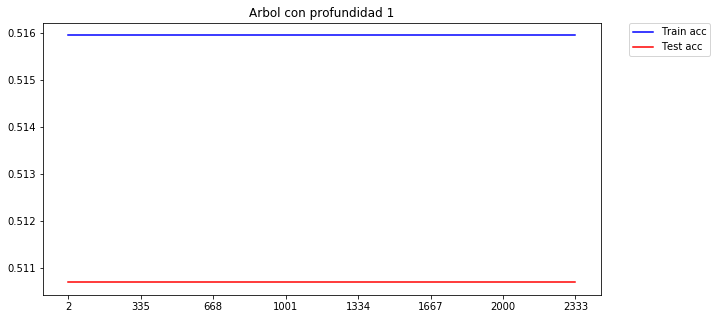

Mejor precision:  0.5106861642294713


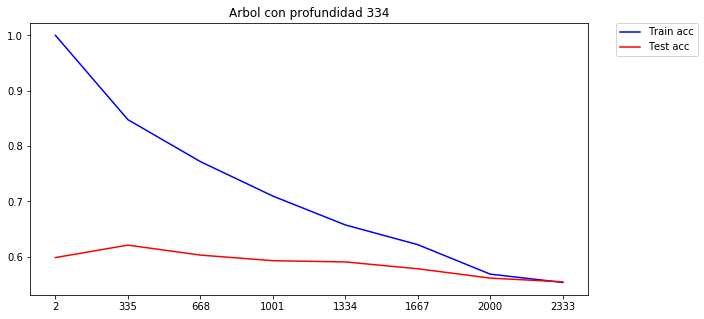

Mejor precision:  0.6209223847019123


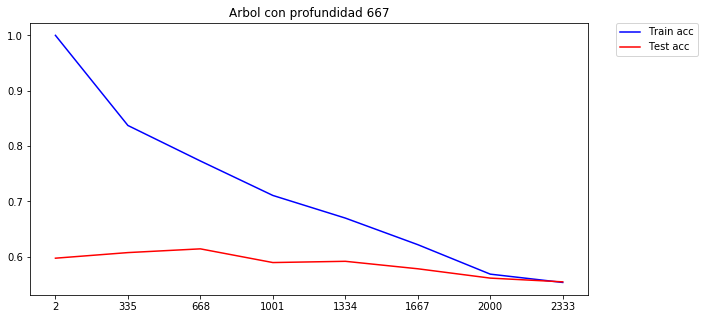

Mejor precision:  0.6141732283464567


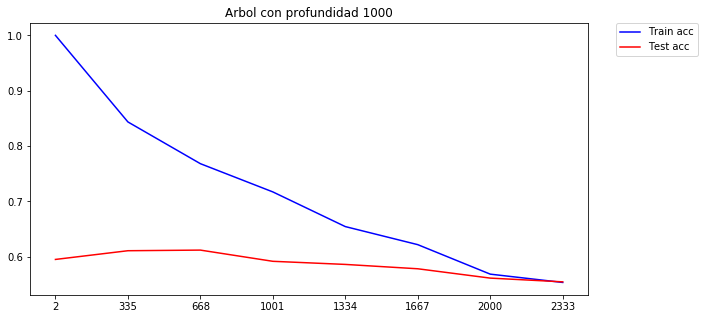

Mejor precision:  0.6119235095613048


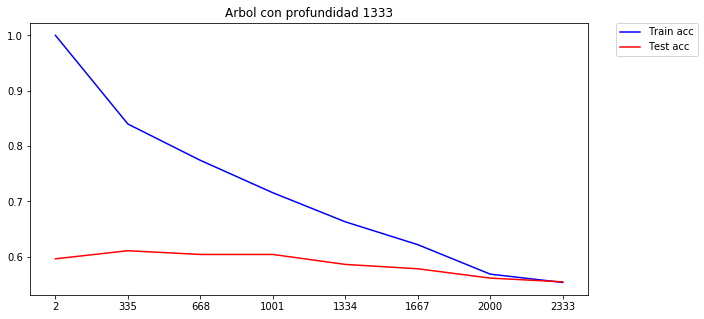

Mejor precision:  0.6107986501687289


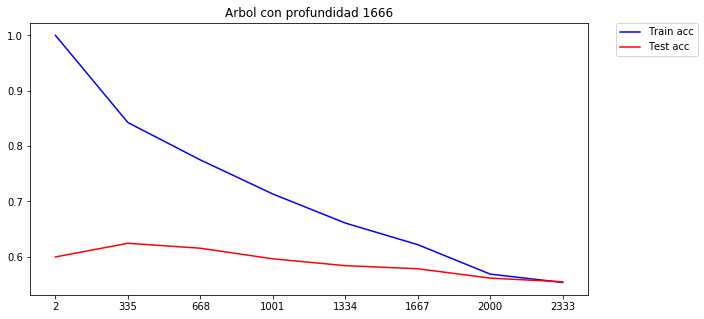

Mejor precision:  0.6242969628796401


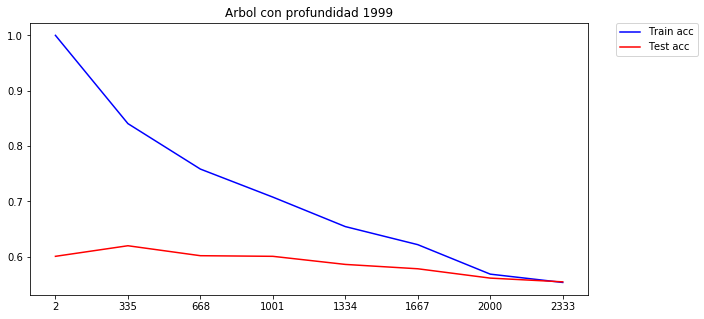

Mejor precision:  0.6197975253093363


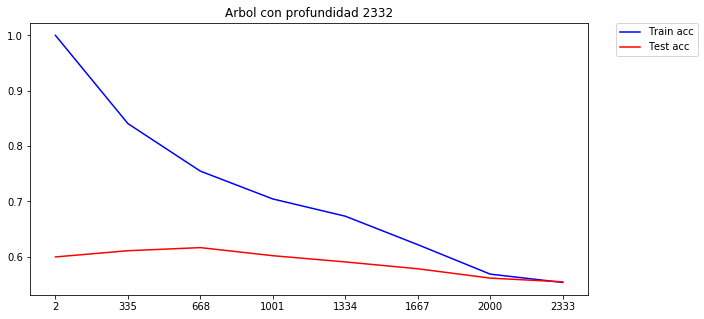

Mejor precision:  0.6164229471316085


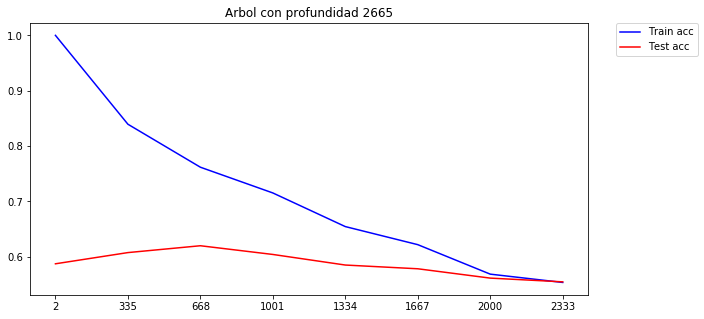

Mejor precision:  0.6197975253093363


In [35]:
#Buscamos un buen valor para min_samples_split, para después variar max_depth

particion = len(labels_train)/8
print(particion)
Profundidad = [i for i in range(1,len(labels_train)+1,int(particion))]
Samples = [i for i in range(2,len(labels_train)+1,int(particion))]
print(Profundidad)

for p in Profundidad:
    train_acc_lista = []
    test_acc_lista = []
    for s in Samples:
        model, train_acc, test_acc = do_Tree(features_train_st,labels_train,features_val_st,labels_val, param_d = p , param_m = s)
        train_acc_lista.append(train_acc)
        test_acc_lista.append(test_acc)

    plt.figure(figsize=(10,5))
    best_test_acc_Tree = max(test_acc_lista)
    #print(best_test_acc_Tree)

    xi = list(range(1,len(labels_train),int(particion)))
    plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
    plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(xi,Samples)
    plt.title("Arbol con profundidad "+str(p))

    plt.show()
    
    print("Mejor precision: ", best_test_acc_Tree)

**R:** En este caso, se obtiene mejor precisión de alrededor 0.6243 con árbol con profundidad máxima 1666, obteniéndose hasta este punto la menor diferencia con respecto a la representación anterior, con una diferencia de 0.004

> ANN

Neuron hidden =  2
Neuron hidden =  4
Neuron hidden =  8
Neuron hidden =  16
Neuron hidden =  32
Neuron hidden =  64
Neuron hidden =  128
Neuron hidden =  256
Neuron hidden =  512


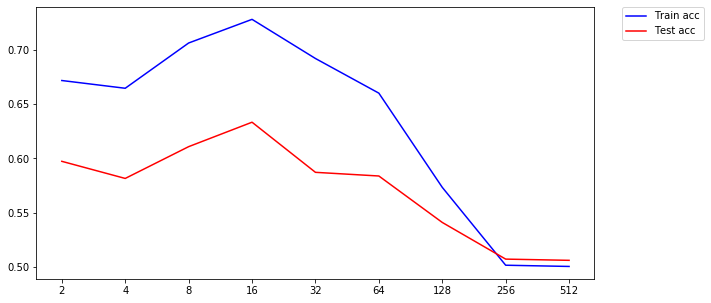

Mejor test accuracy de ANN: 0.6332958340644836 con cantidad de neuronas artificiales: 16


In [36]:
N_h = [2**i for i in range(1,10)]

train_acc_lista = []
test_acc_lista = []

for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train_st,labels_train,features_val_st,labels_val, param = i)
    
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    if(test_acc >= max(test_acc_lista)):
        mejor_cant_neuronas = i
    
best_test_acc_ANN = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(1,10))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, N_h)

plt.show()

print("Mejor test accuracy de ANN:", best_test_acc_ANN, "con cantidad de neuronas artificiales:", mejor_cant_neuronas)

**R:** El gráfico cambia bastante pero la test accuracy se mantiene muy cercana.

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [40]:
#Mejor modelo, logistic regression c = 1

model_st, train_acc, test_acc = do_LOGIT(features_train_st, labels_train, features_val_st, labels_val, param = 1)


from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
    
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 1)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.73      0.72      0.72      1803
           +       0.72      0.72      0.72      1751

    accuracy                           0.72      3554
   macro avg       0.72      0.72      0.72      3554
weighted avg       0.72      0.72      0.72      3554



**R:** Aparecen porcentajes muy parecidos entre las clases "-" y "+", es difícil representar indicaciones de cómo se podría mejorar o cuál sería la causa de la falla.

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [41]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.65      0.87      0.74      1803
           +       0.79      0.52      0.63      1751

    accuracy                           0.70      3554
   macro avg       0.72      0.69      0.69      3554
weighted avg       0.72      0.70      0.69      3554



**R:** En este caso cambian los números excepto de la columna "support", como se decidió detectar con mayor interés con una relación 5:1 los textos negativos que los positivos, aumentó la distancia entre los puntajes precision, recall y f1-score entre las clases "-" y "+", disminuyendo en precision para los negativos pero aumentando en recall y f1-score.

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [42]:
#Mejor modelo, logistic regression c = 1
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 1)

test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.25678774 0.74321226]
Raw text:  the overall feel of the film is pretty cheesy , but there's still a real sense that the star trek tradition has been honored as best it can , given the embarrassing script and weak direction .

True sent:  1.0 -- Pred sent:  [0.28050257 0.71949743]
Raw text:  gently humorous and touching .

True sent:  0.0 -- Pred sent:  [0.91922451 0.08077549]
Raw text:  the transporter bombards the viewer with so many explosions and side snap kicks that it ends up being surprisingly dull .

True sent:  1.0 -- Pred sent:  [0.70670682 0.29329318]
Raw text:  a dazzling thing to behold -- as long as you're wearing the somewhat cumbersome 3d goggles the theater provides .

True sent:  1.0 -- Pred sent:  [0.29288792 0.70711208]
Raw text:  while cherish doesn't completely survive its tonal transformation from dark comedy to suspense thriller , it's got just enough charm and appealing character quirks to forgive that still serious problem .

T

In [43]:
#Mejor modelo, logistic regression c = 1
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = 1)

test_pred = model.predict(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  0.0
Raw text:  this dubious product of a college-spawned ( colgate u . ) comedy ensemble known as broken lizard plays like a mix of cheech and chong and chips .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  . . . lacks the punch and verve needed to make this genre soar .

True sent:  1.0 -- Pred sent:  1.0
Raw text:  exquisitely nuanced in mood tics and dialogue , this chamber drama is superbly acted by the deeply appealing veteran bouquet and the chilling but quite human berling .

True sent:  1.0 -- Pred sent:  1.0
Raw text:  barry convinces us he's a dangerous , secretly unhinged guy who could easily have killed a president because it made him feel powerful .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  [i]t's certainly laudable that the movie deals with hot-button issues in a comedic context , but barbershop isn't as funny as it should be .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  a simpler , leaner treatment would have been preferable ; afte

**R:** La que entrega mayor información es la predicción continua, ya que retorna cuánto porcentaje se inclina por una clase y en el caso de que sean porcentajes muy cercanos (como por ejemplo 0.52 y 0.48), se tiene la información de es una predicción difícil, en cambio con el mismo ejemplo en predicción categórica sólo entregaría una respuesta (0 ó 1) sin saber qué tan seguro está el modelo de esa predicción.

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

**R:** En este caso, la mejora parece estar entre la variación de los modelos y sus parámetros, ya que la modificación de la representación no entregaba una mejora o empeoramiento muy fuerte de la test accuracy. El mejor modelo de aprendizaje para este caso fue el de regresión logística con parámetro C = 1 ya que fue rápido y obtuvo la mejor test accuracy de todos los modelos en ambas representaciones. 

## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.
```
wget http://fprodrigues.com//mturk-datasets.tar.gz
```

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona

```python
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 
```

> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La métrica de evaluación será el *accuracy score*

```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
```

#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```

In [2]:
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv")

In [3]:
df

,WorkerId,Input.id,Input.original_sentence,Input.stemmed_sent,Input.true_sent,Answer.sent
0,A2HD5XMM48KKJW,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
1,A2HD5XMM48KKJW,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
2,A2HD5XMM48KKJW,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,pos
3,A2HD5XMM48KKJW,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,neg
4,A2HD5XMM48KKJW,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,pos
5,A233ONYNWKDIYF,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
6,A233ONYNWKDIYF,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
7,A233ONYNWKDIYF,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,neg
8,A233ONYNWKDIYF,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,pos
9,A233ONYNWKDIYF,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,neg


En el dataframe existen inputs enviados por personas dando su respuesta con respecto al sentiment analysis de la frase evaluada, con casos en que la frase fue evaluada por más de una persona. Para reducir la cantidad de filas del dataframe, se creará uno nuevo tal que la frase exista sólo una vez y la respuesta enviada será la determinada por mayoría simple.

No se utiliza sugerencia
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
file = open(GLOVE_FILE, encoding="utf8")
for line in file:
    #print(line)
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
```

#embeddings_index.get("yes")

In [4]:
from statistics import mean

dicc = {}
cont = 0
while cont < df.shape[0]:
    if(df["Answer.sent"][cont] == 'pos'):
        respuesta_como_numero = 1
    else:
        respuesta_como_numero = 0
    if df["Input.stemmed_sent"][cont] not in dicc.keys(): #Si no esta, se agrega
        if(df["Input.true_sent"][cont] == 'pos'):
            input_como_numero = 1
        else:
            input_como_numero = 0
        dicc[df["Input.stemmed_sent"][cont]] = (list(), input_como_numero) # El value de la key será una tupla con una lista donde se guardarán todas las respuestas para la misma frase y como segundo valor el True sent
    dicc[df["Input.stemmed_sent"][cont]][0].append(respuesta_como_numero) # Acá cae cuando ya existe la key con su lista
    cont = cont + 1

In [5]:
rows = []
cont = 0

for i in dicc.keys():
    lista = []
    #Calcular promedio de la lista de answer.sent
    promedio = mean(dicc[i][0])
    #Determinar si es 1 o 0
    if(promedio >= 0.5):
        answer_sent_final = 1
    else:
        answer_sent_final = 0
    #Agregar a lista
    lista.append(answer_sent_final)
    lista.append(i)
    lista.append(dicc[i][1])
    #Agregar a rows
    rows.append(lista)

In [6]:
df_train = pd.DataFrame(rows, columns = ['Sentiment', 'Text', 'Inputtruesent'])
df_train_text = df_train.Text
labels_train = df_train.Sentiment
labels_test = df_train.Inputtruesent

> Construccion conjunto de validación para seleccionar modelo

In [7]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.25, random_state=0)

In [8]:
texts_train = []
texts_val = []

for frase in df_train_text:
    texts_train.append(frase)

for frase in df_val_text:
    texts_val.append(frase)

#texts_train

> Vectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
# transform val and test

features_val = vectorizer.transform(texts_val)

#
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

> Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    #print("Param C = ",param)
    model= LogisticRegression(solver='lbfgs', max_iter=2000)
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

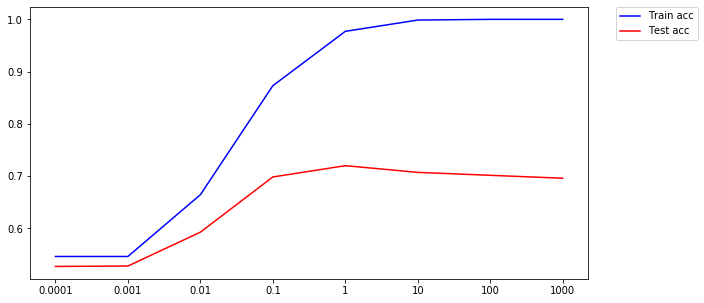

Mejor test accuracy de Logistic Regression: 0.72


In [11]:
Cs = [10**i for i in range(-4,4)]
train_acc_lista = []
test_acc_lista = []
for i in range(0,8):
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param = Cs[i])
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    #print(" /// Train accuracy = " + str(train_acc) + " /// Test accuracy = " + str(test_acc))
    
best_test_acc_LGRegression = max(test_acc_lista)
plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)
plt.show()

print("Mejor test accuracy de Logistic Regression:", best_test_acc_LGRegression)

> kNN

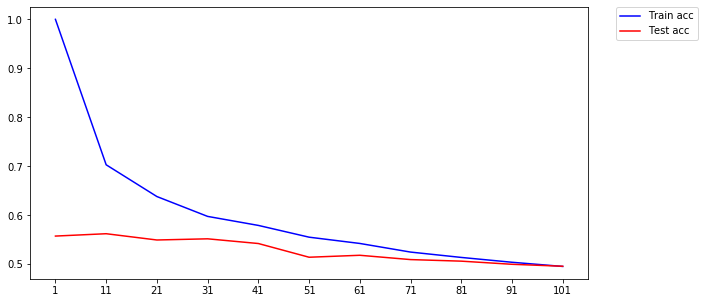

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K =",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

train_acc_lista = []
test_acc_lista = []

Cs = [i for i in range(1,102,10)]

for i in range(0, 11):
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param = int(Cs[i]))
    train_acc_lista.append(train_acc)
    test_acc_lista.append(test_acc)
    
best_test_acc_kNN = max(test_acc_lista)

plt.figure(figsize=(10,5))

xi = list(range(len(Cs)))
plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, Cs)
plt.show("Presicion con KNN")

plt.show()


In [13]:
print("Mejor test_accuracy de kNN:", best_test_acc_kNN)

Mejor test_accuracy de kNN: 0.5624


> Árbol de decisión

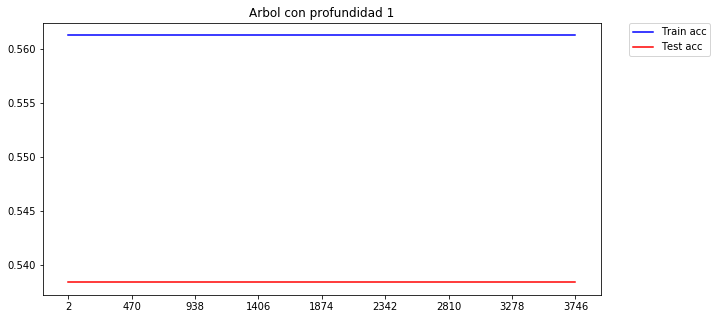

Mejor precision:  0.5384


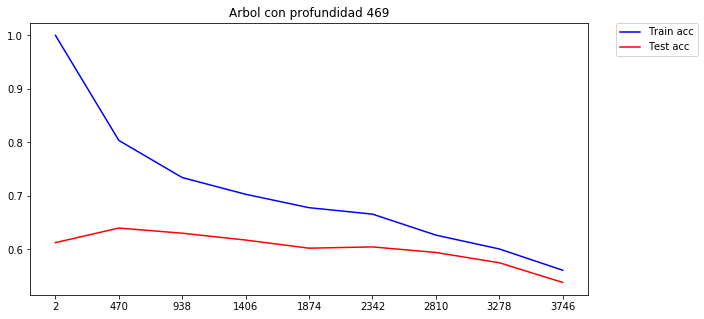

Mejor precision:  0.64


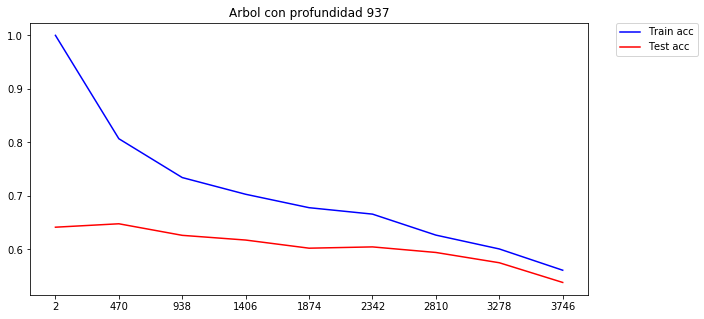

Mejor precision:  0.648


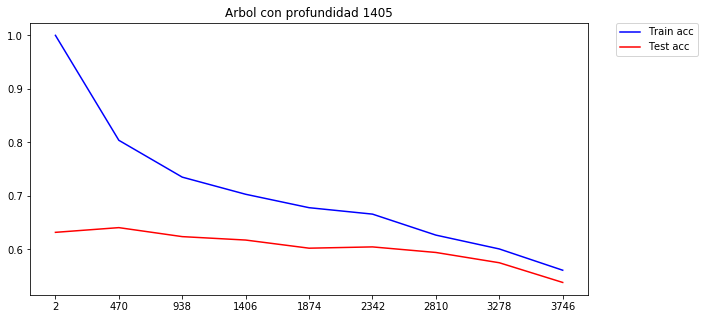

Mejor precision:  0.6408


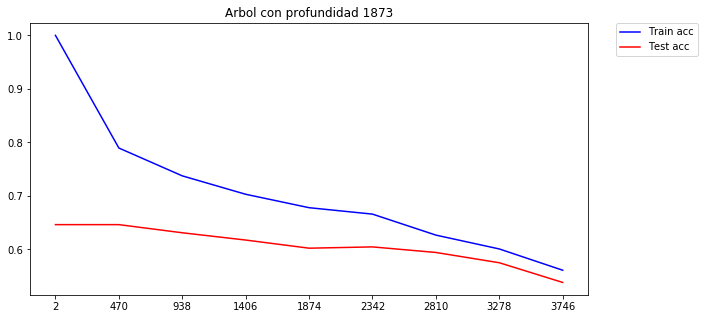

Mejor precision:  0.6464


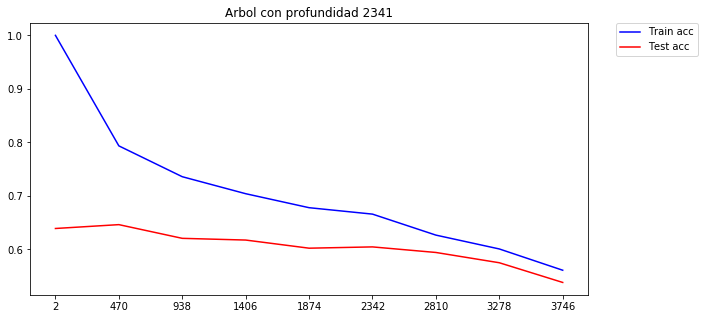

Mejor precision:  0.6464


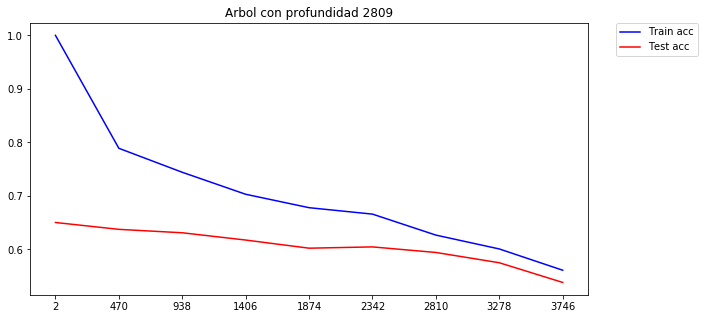

Mejor precision:  0.6504


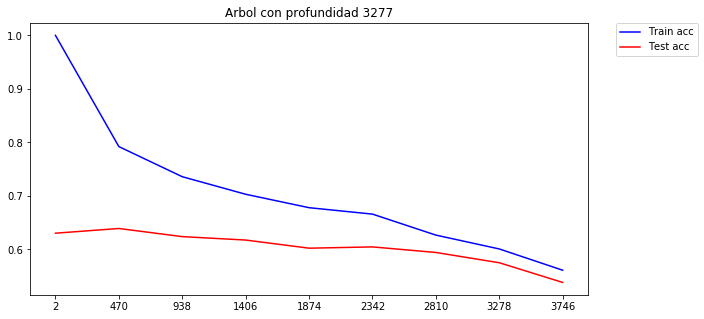

Mejor precision:  0.6392


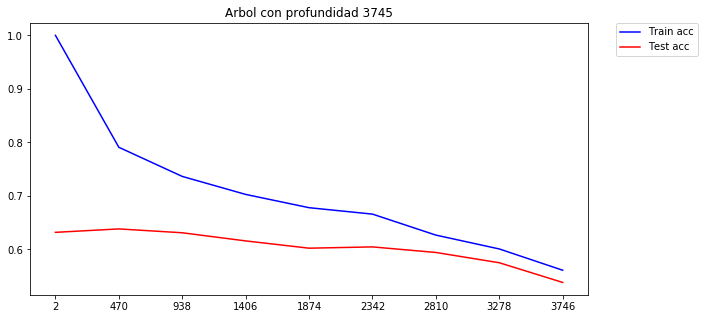

Mejor precision:  0.6384


In [14]:
from sklearn.tree import DecisionTreeClassifier as Tree

def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D =",param_d, 'Min-samples-S =', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

#Buscamos un buen valor para min_samples_split, para después variar max_depth

particion = len(labels_train)/8
Profundidad = [i for i in range(1,len(labels_train)+1,int(particion))]
Samples = [i for i in range(2,len(labels_train)+1,int(particion))]

for p in Profundidad:
    train_acc_lista = []
    test_acc_lista = []
    for s in Samples:
        model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d = p , param_m = s)
        train_acc_lista.append(train_acc)
        test_acc_lista.append(test_acc)

    plt.figure(figsize=(10,5))
    best_test_acc_Tree = max(test_acc_lista)

    xi = list(range(1,len(labels_train),int(particion)))
    plt.plot(xi, train_acc_lista, linestyle='-', color='b', label='Train acc')
    plt.plot(xi, test_acc_lista, linestyle='-', color='r', label='Test acc')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(xi,Samples)
    plt.title("Arbol con profundidad "+str(p))

    plt.show()
    
    print("Mejor precision: ", best_test_acc_Tree)

**R:** Se obtiene mejor precisión con el árbol de profundidad 1405, con test acc de 0.6552

> Con SVM's y Redes neuronales artificiales se demoraba mucho en entrenar así que los descartamos

In [15]:
print("Resumen:")
print("Mejor test accuracy de Logistic Regression:", best_test_acc_LGRegression)
print("Mejor test_accuracy de kNN:", best_test_acc_kNN)
print("Mejor test_accuracy de Tree:", "0.6552")

Resumen:
Mejor test accuracy de Logistic Regression: 0.72
Mejor test_accuracy de kNN: 0.5624
Mejor test_accuracy de Tree: 0.6552


Bien cercanas, se escoge Logistic Regression, al igual que en ejercicio anterior, con C = **1**

In [16]:
df_train_text = df_train.Text
labels_train = df_train.Sentiment

In [17]:
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(df_train_text)
features_train = vectorizer.transform(df_train_text)

In [28]:
from sklearn.metrics import accuracy_score

model= LogisticRegression(penalty='l2',solver='lbfgs')
model.set_params(C= 1)
model.fit(features_train,labels_train)

print("Precisión de predicción de ground truth:", accuracy_score(labels_test, model.predict(features_train)))

Precisión de predicción de ground truth: 0.8669733946789357
